In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

# Reading and understanding the data

In [2]:
# Reading the dataset
TC = pd.read_csv('telecom_churn_data.csv')
TC.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
TC.shape

(99999, 226)

In [4]:
TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
TC.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Handling missing values

#### Handling missing values in columns

In [6]:
# Cheking percent of missing values in columns
TC_missing_columns = (round(((TC.isnull().sum()/len(TC.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
TC_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [7]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(TC_missing_columns.index[TC_missing_columns['null'] > 30])

In [8]:
# Delete the columns having more than 30% missing values
TC = TC.drop(col_list_missing_30, axis=1)

In [9]:
TC.shape

(99999, 186)

##### We will delete the date columns from the dataset, as they are not necessary for our analysis. This will help streamline the data and focus on the features that contribute to our model.

In [10]:
# List the date columns
Date_Coloumns = [k for k in TC.columns.to_list() if 'date' in k]
print(Date_Coloumns)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [11]:
# Dropping date columns
TC = TC.drop(Date_Coloumns, axis=1)

We will drop the circle_id column from the dataset, as it contains only one unique value. Since this column does not provide any variability, it will have no impact on our data analysis.

In [12]:
# Drop circle_id column
TC = TC.drop('circle_id', axis=1)

In [13]:
TC.shape

(99999, 177)

### Filter high-value customers

To create the column avg_rech_amt_6_7, we will sum the total recharge amounts for months 6 and 7. Subsequently, we will calculate the average of this sum for each customer. This new column will provide insights into the average recharge behavior during these two months.

In [14]:
TC['avg_rech_amt_6_7'] = (TC['total_rech_amt_6'] + TC['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [15]:
T = TC['avg_rech_amt_6_7'].quantile(0.7)
T

368.5

Filter the customers, who have recharged more than or equal to X.

In [16]:
TC = TC[TC['avg_rech_amt_6_7'] >= T]
TC.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [17]:
TC.shape

(30011, 178)

We can see that we have around ***~30K*** rows after filtering

#### Handling missing values in rows

In [18]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = TC[(TC.isnull().sum(axis=1)) > (len(TC.columns)//2)]
df_missing_rows_50.shape

(114, 178)

In [19]:
# Deleting the rows having more than 50% missing values
TC = TC.drop(df_missing_rows_50.index)
TC.shape

(29897, 178)

In [20]:
# Checking the missing values in columns again
TC_missing_columns = (round(((TC.isnull().sum()/len(TC.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
TC_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

In [21]:
# Listing the columns of MOU Sep(9)
print(((TC_missing_columns[TC_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [22]:
# Creating a DataFrame with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = TC[(TC['loc_og_t2m_mou_9'].isnull()) & (TC['loc_ic_t2f_mou_9'].isnull()) & (TC['roam_og_mou_9'].isnull()) & (TC['std_ic_t2m_mou_9'].isnull()) &
  (TC['loc_og_t2t_mou_9'].isnull()) & (TC['std_ic_t2t_mou_9'].isnull()) & (TC['loc_og_t2f_mou_9'].isnull()) & (TC['loc_ic_mou_9'].isnull()) &
  (TC['loc_og_t2c_mou_9'].isnull()) & (TC['loc_og_mou_9'].isnull()) & (TC['std_og_t2t_mou_9'].isnull()) & (TC['roam_ic_mou_9'].isnull()) &
  (TC['loc_ic_t2m_mou_9'].isnull()) & (TC['std_og_t2m_mou_9'].isnull()) & (TC['loc_ic_t2t_mou_9'].isnull()) & (TC['std_og_t2f_mou_9'].isnull()) & 
  (TC['std_og_t2c_mou_9'].isnull()) & (TC['og_others_9'].isnull()) & (TC['std_og_mou_9'].isnull()) & (TC['spl_og_mou_9'].isnull()) & 
  (TC['std_ic_t2f_mou_9'].isnull()) & (TC['isd_og_mou_9'].isnull()) & (TC['std_ic_mou_9'].isnull()) & (TC['offnet_mou_9'].isnull()) & 
  (TC['isd_ic_mou_9'].isnull()) & (TC['ic_others_9'].isnull()) & (TC['std_ic_t2o_mou_9'].isnull()) & (TC['onnet_mou_9'].isnull()) & 
  (TC['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [23]:
df_null_mou_9.shape

(1590, 178)

In [24]:
# Deleting the records for which MOU for Sep(9) are null
TC = TC.drop(df_null_mou_9.index)

In [25]:
# Again Cheking percent of missing values in columns
TC_missing_columns = (round(((TC.isnull().sum()/len(TC.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
TC_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [26]:
# Listing the columns of MOU Aug(8)
print(((TC_missing_columns[TC_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [27]:
# Creating a DataFrame with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = TC[(TC['loc_og_t2m_mou_8'].isnull()) & (TC['loc_ic_t2f_mou_8'].isnull()) & (TC['roam_og_mou_8'].isnull()) & (TC['std_ic_t2m_mou_8'].isnull()) &
  (TC['loc_og_t2t_mou_8'].isnull()) & (TC['std_ic_t2t_mou_8'].isnull()) & (TC['loc_og_t2f_mou_8'].isnull()) & (TC['loc_ic_mou_8'].isnull()) &
  (TC['loc_og_t2c_mou_8'].isnull()) & (TC['loc_og_mou_8'].isnull()) & (TC['std_og_t2t_mou_8'].isnull()) & (TC['roam_ic_mou_8'].isnull()) &
  (TC['loc_ic_t2m_mou_8'].isnull()) & (TC['std_og_t2m_mou_8'].isnull()) & (TC['loc_ic_t2t_mou_8'].isnull()) & (TC['std_og_t2f_mou_8'].isnull()) & 
  (TC['std_og_t2c_mou_8'].isnull()) & (TC['og_others_8'].isnull()) & (TC['std_og_mou_8'].isnull()) & (TC['spl_og_mou_8'].isnull()) & 
  (TC['std_ic_t2f_mou_8'].isnull()) & (TC['isd_og_mou_8'].isnull()) & (TC['std_ic_mou_8'].isnull()) & (TC['offnet_mou_8'].isnull()) & 
  (TC['isd_ic_mou_8'].isnull()) & (TC['ic_others_8'].isnull()) & (TC['std_ic_t2o_mou_8'].isnull()) & (TC['onnet_mou_8'].isnull()) & 
  (TC['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [28]:
# Deleting the records for which MOU for Aug(8) are null
TC = TC.drop(df_null_mou_8.index)

In [29]:
# Again checking percent of missing values in columns
TC_missing_columns = (round(((TC.isnull().sum()/len(TC.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
TC_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [30]:
# Listing the columns of MOU Jun(6)
print(((TC_missing_columns[TC_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [31]:
# Creating a DataFrame with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = TC[(TC['loc_og_t2m_mou_6'].isnull()) & (TC['loc_ic_t2f_mou_6'].isnull()) & (TC['roam_og_mou_6'].isnull()) & (TC['std_ic_t2m_mou_6'].isnull()) &
  (TC['loc_og_t2t_mou_6'].isnull()) & (TC['std_ic_t2t_mou_6'].isnull()) & (TC['loc_og_t2f_mou_6'].isnull()) & (TC['loc_ic_mou_6'].isnull()) &
  (TC['loc_og_t2c_mou_6'].isnull()) & (TC['loc_og_mou_6'].isnull()) & (TC['std_og_t2t_mou_6'].isnull()) & (TC['roam_ic_mou_6'].isnull()) &
  (TC['loc_ic_t2m_mou_6'].isnull()) & (TC['std_og_t2m_mou_6'].isnull()) & (TC['loc_ic_t2t_mou_6'].isnull()) & (TC['std_og_t2f_mou_6'].isnull()) & 
  (TC['std_og_t2c_mou_6'].isnull()) & (TC['og_others_6'].isnull()) & (TC['std_og_mou_6'].isnull()) & (TC['spl_og_mou_6'].isnull()) & 
  (TC['std_ic_t2f_mou_6'].isnull()) & (TC['isd_og_mou_6'].isnull()) & (TC['std_ic_mou_6'].isnull()) & (TC['offnet_mou_6'].isnull()) & 
  (TC['isd_ic_mou_6'].isnull()) & (TC['ic_others_6'].isnull()) & (TC['std_ic_t2o_mou_6'].isnull()) & (TC['onnet_mou_6'].isnull()) & 
  (TC['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [32]:
# Deleting the records for which MOU for Jun(6) are null
TC = TC.drop(df_null_mou_6.index)

In [33]:
# Again cheking percent of missing values in columns
TC_missing_columns = (round(((TC.isnull().sum()/len(TC.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
TC_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [34]:
# Listing the columns of MOU Jul(7)
print(((TC_missing_columns[TC_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [35]:
# Creating a DataFrame with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = TC[(TC['loc_og_t2m_mou_7'].isnull()) & (TC['loc_ic_t2f_mou_7'].isnull()) & (TC['roam_og_mou_7'].isnull()) & (TC['std_ic_t2m_mou_7'].isnull()) &
  (TC['loc_og_t2t_mou_7'].isnull()) & (TC['std_ic_t2t_mou_7'].isnull()) & (TC['loc_og_t2f_mou_7'].isnull()) & (TC['loc_ic_mou_7'].isnull()) &
  (TC['loc_og_t2c_mou_7'].isnull()) & (TC['loc_og_mou_7'].isnull()) & (TC['std_og_t2t_mou_7'].isnull()) & (TC['roam_ic_mou_7'].isnull()) &
  (TC['loc_ic_t2m_mou_7'].isnull()) & (TC['std_og_t2m_mou_7'].isnull()) & (TC['loc_ic_t2t_mou_7'].isnull()) & (TC['std_og_t2f_mou_7'].isnull()) & 
  (TC['std_og_t2c_mou_7'].isnull()) & (TC['og_others_7'].isnull()) & (TC['std_og_mou_7'].isnull()) & (TC['spl_og_mou_7'].isnull()) & 
  (TC['std_ic_t2f_mou_7'].isnull()) & (TC['isd_og_mou_7'].isnull()) & (TC['std_ic_mou_7'].isnull()) & (TC['offnet_mou_7'].isnull()) & 
  (TC['isd_ic_mou_7'].isnull()) & (TC['ic_others_7'].isnull()) & (TC['std_ic_t2o_mou_7'].isnull()) & (TC['onnet_mou_7'].isnull()) & 
  (TC['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [36]:
# Deleting the records for which MOU for Jul(7) are null
TC = TC.drop(df_null_mou_7.index)

In [37]:
# Again cheking percent of missing values in columns
TC_missing_columns = (round(((TC.isnull().sum()/len(TC.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
TC_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


We can see there are no more missing values in any columns.

In [38]:
TC.shape

(27991, 178)

In [39]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(TC.index)/30011)),2)

0.07

We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

### Tag churners

 tag churned customers, we will define the criteria as follows: Customers will be marked as churned (churn = 1) if they have not made any calls—either incoming or outgoing—and have not used mobile internet at all during the fourth month. If customers do not meet these conditions, they will be labeled as non-churned (churn = 0). This method allows us to identify those customers who have ceased engagement with our services during this critical period.

In [40]:
TC['churn'] = np.where((TC['total_ic_mou_9']==0) & (TC['total_og_mou_9']==0) & (TC['vol_2g_mb_9']==0) & (TC['vol_3g_mb_9']==0), 1, 0)

In [41]:
TC.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


#### Deleting all the attributes corresponding to the churn phase

In [42]:
# List the columns for churn month(9)
col_9 = [col for col in TC.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [43]:
# Deleting the churn month columns
TC = TC.drop(col_9, axis=1)

In [44]:
# Dropping sep_vbc_3g column
TC = TC.drop('sep_vbc_3g', axis=1)

#### Checking churn percentage

In [45]:
round(100*(TC['churn'].mean()),2)

3.39

There is very little percentage of churn rate. We will take care of the class imbalance later.

## Outliers treatment

In the filtered dataset, all columns except for mobile_number and churn are of numeric data types. Therefore, we will convert the data types of both the mobile_number and churn columns to object (string) types. This conversion is essential for maintaining the integrity of the data and ensuring that these fields are handled appropriately in subsequent analyses.

In [46]:
TC['mobile_number'] = TC['mobile_number'].astype(object)
TC['churn'] = TC['churn'].astype(object)

In [47]:
TC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [48]:
# List only the numeric columns
Numeric_col = TC.select_dtypes(exclude=['object']).columns
print(Numeric_col)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [49]:
# Removing outliers below 10th and above 90th percentile
for col in Numeric_col: 
    q1 = TC[col].quantile(0.10)
    q3 = TC[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = TC.loc[(TC[col] > range_low) & (TC[col] < range_high)]
data.shape

(27705, 136)

### Derive new features

In [50]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column 
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [51]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [52]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [53]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [54]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [55]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


#### Deriving new column `decrease_rech_num_action`
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [56]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [57]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [58]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [59]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


#### Deriving new column ``
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [60]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [61]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [62]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [63]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


#### Deriving new column 
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [64]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [65]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [66]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [67]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


#### Deriving new column `
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [68]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [69]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [70]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [71]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


## EDA

### Univariate analysis

##### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [72]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

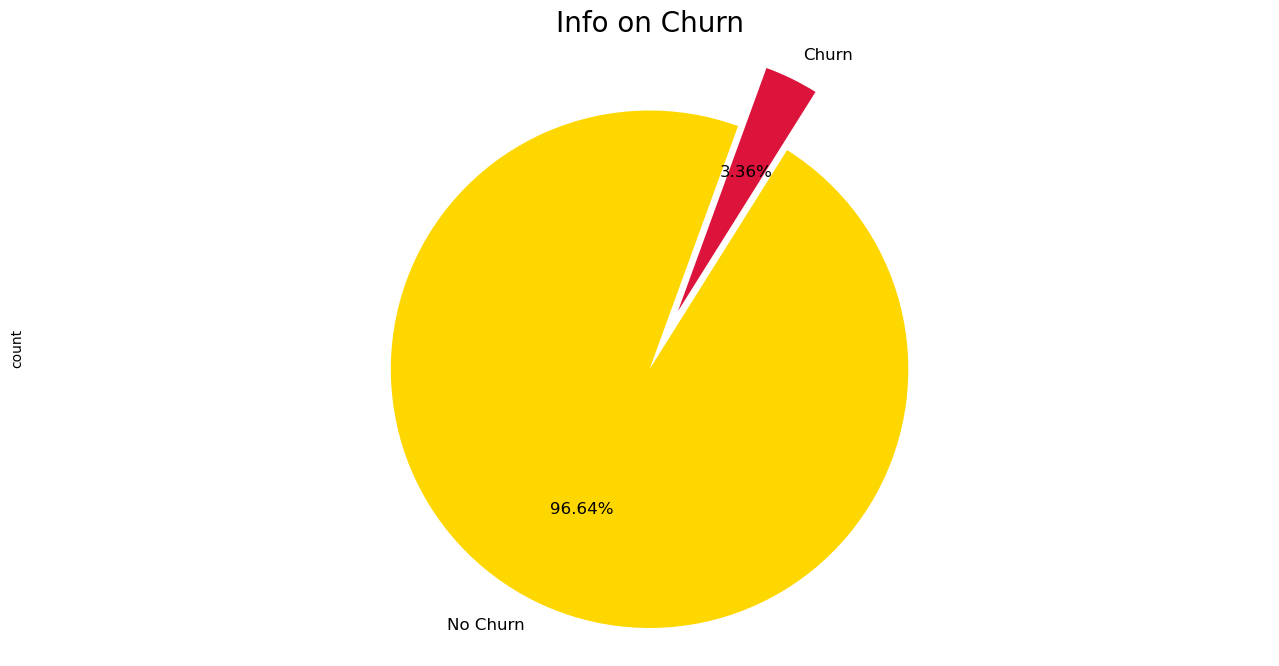

In [73]:
plt.figure(figsize=(16, 8))
colors = ["#FFD700", "#DC143C"]  # Gold and Crimson

labels = ["No Churn", "Churn"]
plt.title('Info on Churn', fontsize=20)

data["churn"].value_counts().plot.pie(
    explode=[0, 0.25], 
    autopct='%1.2f%%', 
    colors=colors, 
    labels=labels, 
    fontsize=12, 
    startangle=70
)
plt.axis('equal')
plt.show()


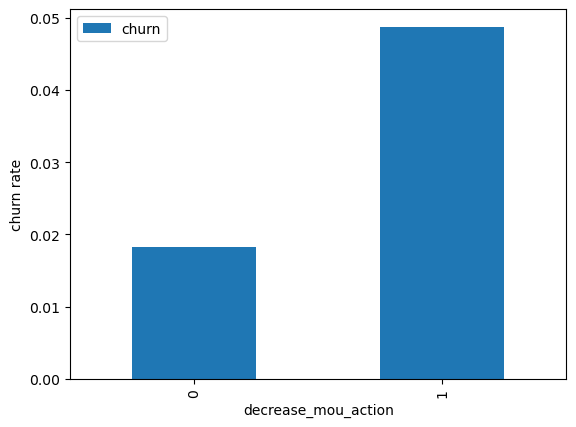

In [74]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

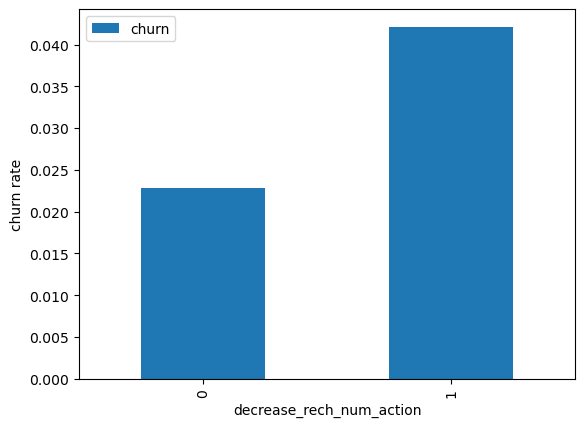

In [75]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

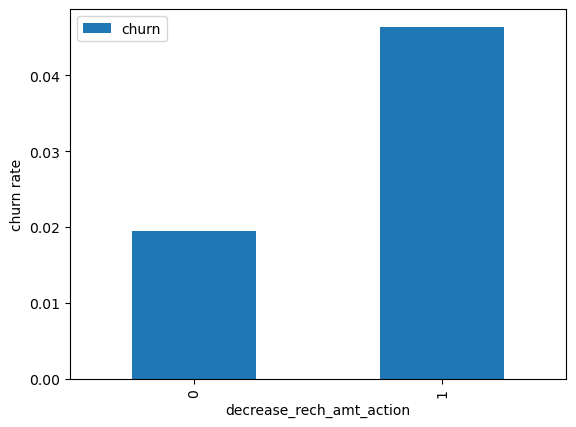

In [76]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

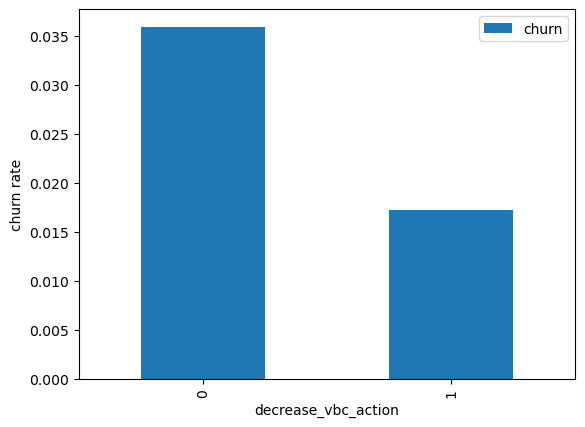

In [77]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

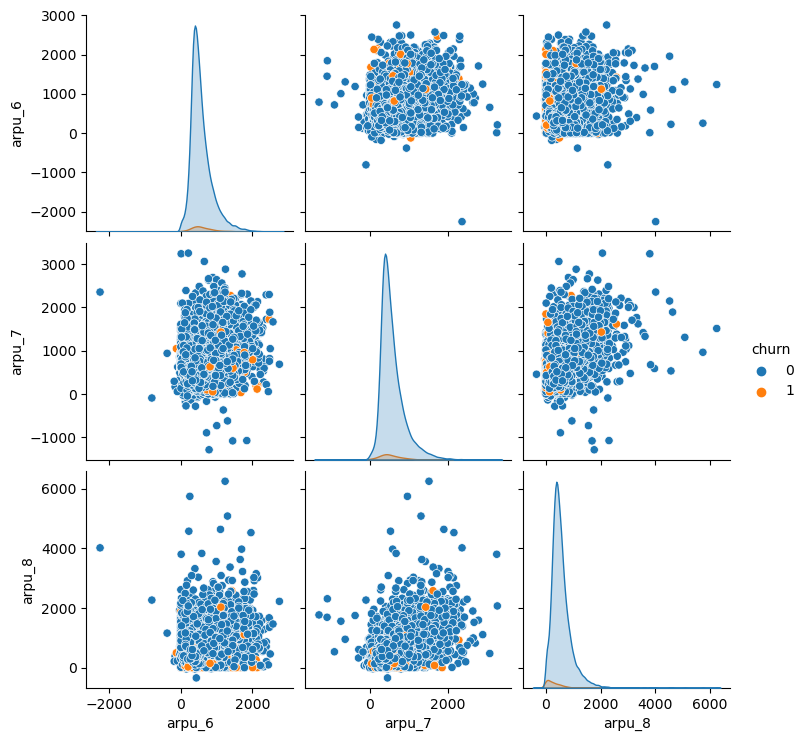

In [78]:
sns.pairplot(data=data[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

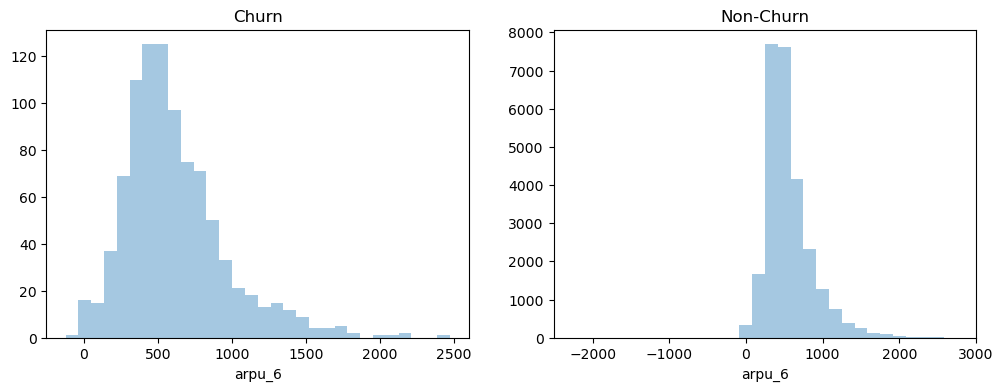

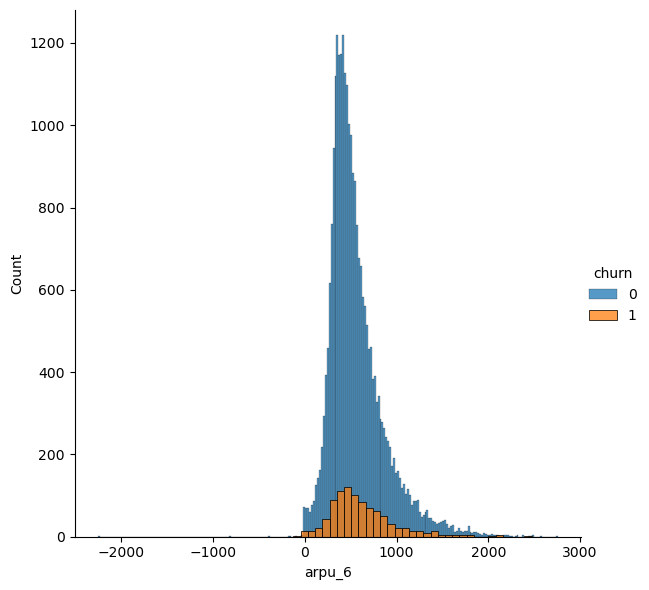

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(data[data['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(data[data['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(data, hue='churn', height=6).map(sns.histplot, "arpu_6").add_legend()



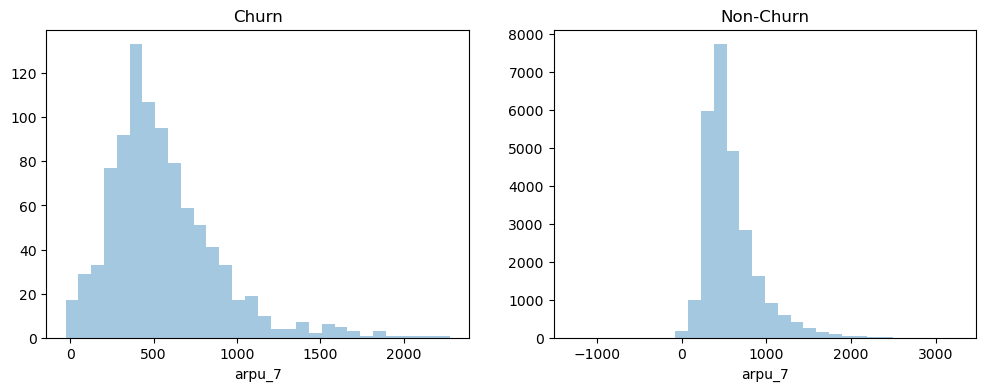

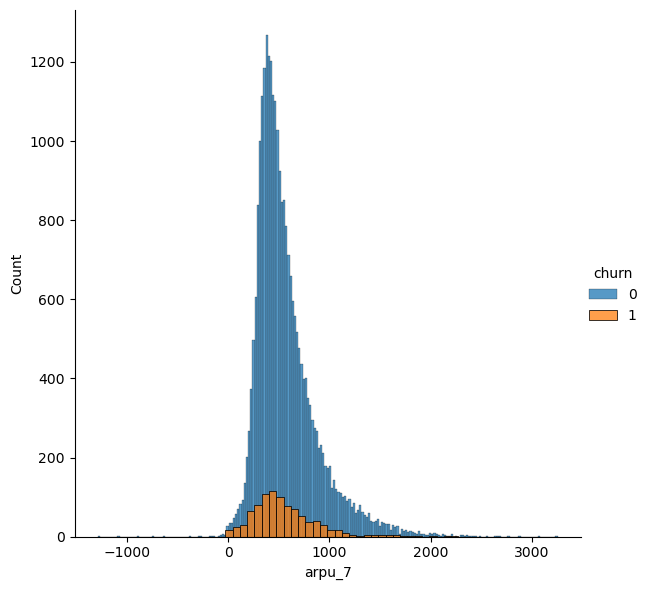

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(data[data['churn']==1].arpu_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(data[data['churn']==0].arpu_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(data, hue='churn', height=6).map(sns.histplot, "arpu_7").add_legend()


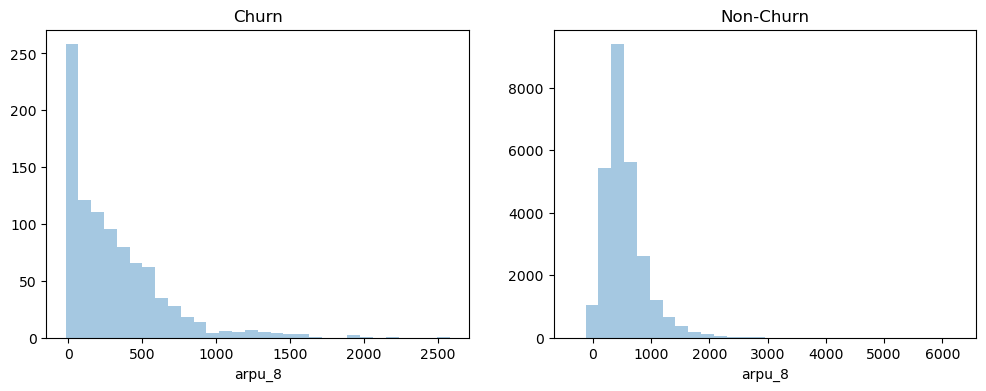

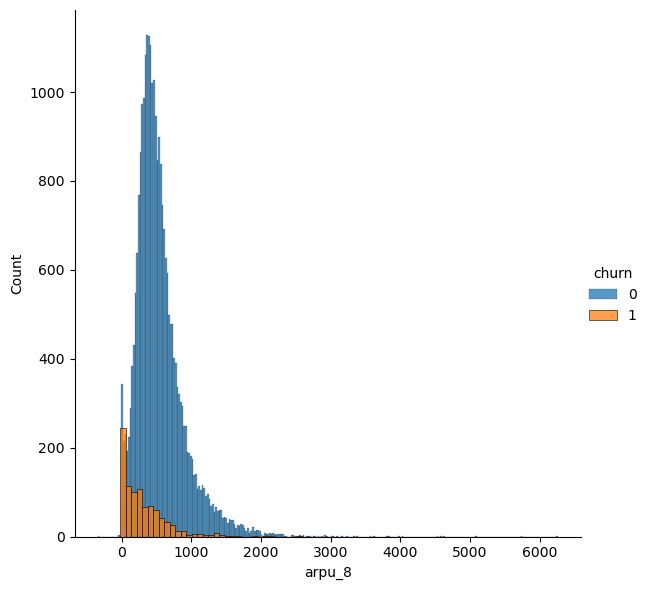

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(data[data['churn']==1].arpu_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(data[data['churn']==0].arpu_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
sns.FacetGrid(data, hue='churn', height=6).map(sns.histplot, "arpu_8").add_legend()

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [82]:
# Creating churn DataFrame
data_churn = data[data['churn'] == 1]
# Creating not churn DataFrame
data_non_churn = data[data['churn'] == 0]

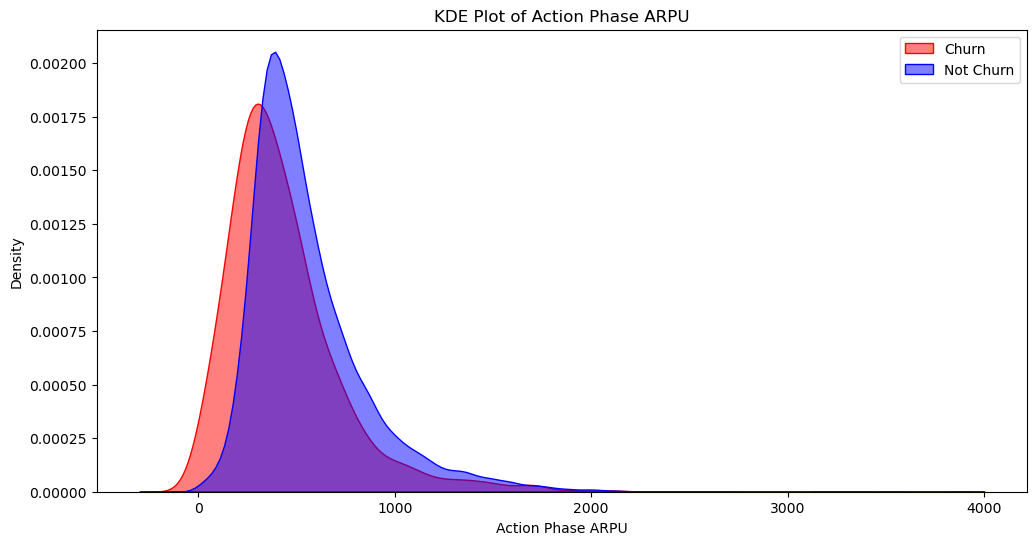

In [83]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data_churn['avg_arpu_action'], label='Churn', fill=True, color='red', alpha=0.5)
sns.kdeplot(data_non_churn['avg_arpu_action'], label='Not Churn', fill=True, color='blue', alpha=0.5)
plt.xlabel('Action Phase ARPU')
plt.title('KDE Plot of Action Phase ARPU')
plt.legend()
plt.show()

The average revenue per user (ARPU) for churned customers is predominantly concentrated between 0 and 900, indicating that higher ARPU customers are less likely to churn. In contrast, the ARPU for non-churned customers is primarily clustered between 0 and 1000, suggesting a broader range of revenue among this group. 

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

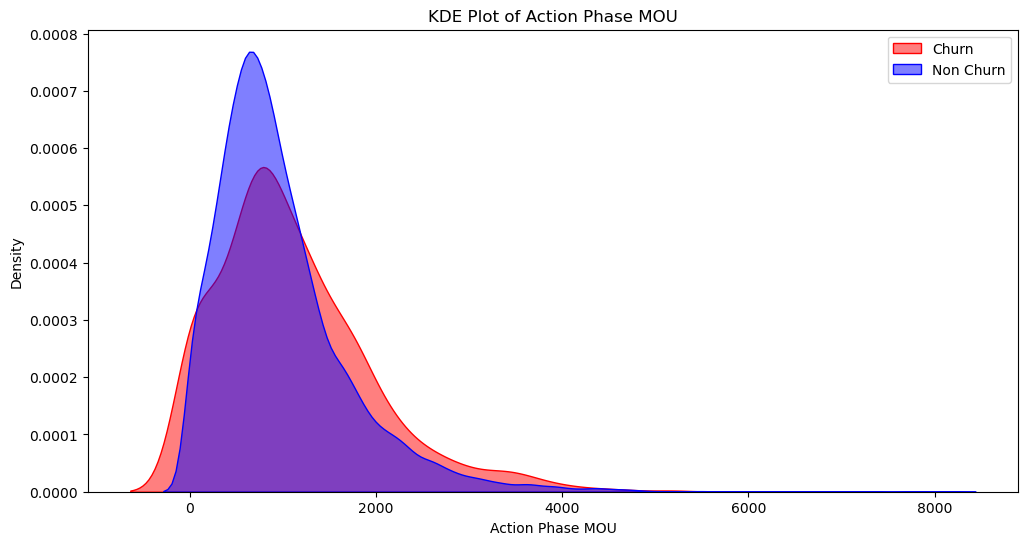

In [84]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data_churn['total_mou_good'], label='Churn', fill=True, color='red', alpha=0.5)
sns.kdeplot(data_non_churn['total_mou_good'], label='Non Churn', fill=True, color='blue', alpha=0.5)
plt.xlabel('Action Phase MOU')
plt.title('KDE Plot of Action Phase MOU')
plt.legend()
plt.show()

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

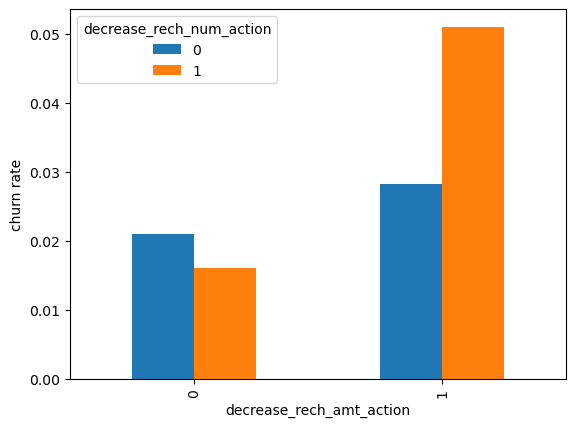

In [85]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

The above plot indicates that the churn rate is higher among customers whose recharge amount and number of recharges have decreased during the action phase compared to the good phase. This suggests that a decline in both recharge behavior metrics is associated with an increased likelihood

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

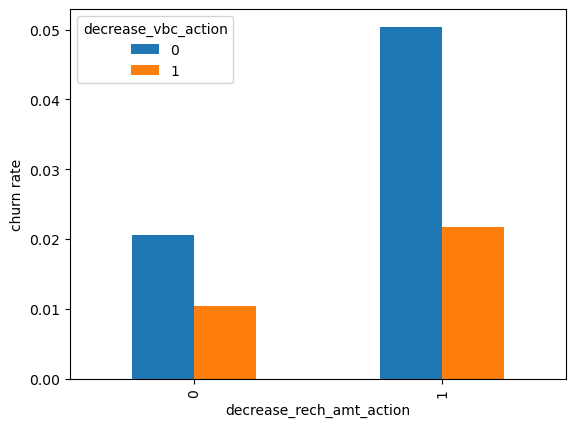

In [86]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

##### Analysis of recharge amount and number of recharge in action month

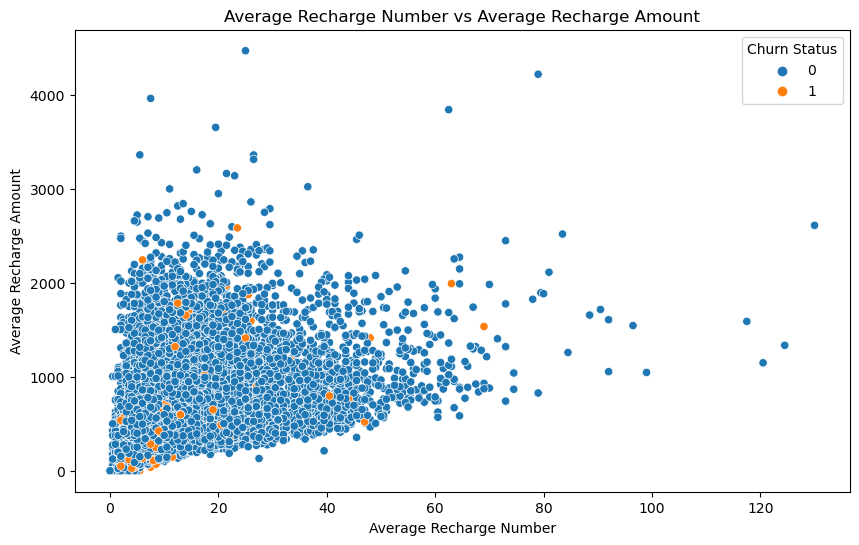

In [87]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn', data=data)
plt.title('Average Recharge Number vs Average Recharge Amount')
plt.xlabel('Average Recharge Number')
plt.ylabel('Average Recharge Amount')
plt.legend(title='Churn Status')
plt.show()

***Analysis***

The pattern observed indicates a strong correlation between the number of recharges and the recharge amount. Generally, as the number of recharges increases, the total amount of recharge also tends to rise. This relationship suggests that customers who engage in more frequent recharges are likely to contribute higher total amounts

#### Dropping few derived columns, which are not required in further analysis

In [88]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train-Test Split

In [89]:
# Import library
from sklearn.model_selection import train_test_split

In [90]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [91]:
# Putting target variable to y
y = data['churn']

In [92]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [93]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [94]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [95]:
# Fittign SMOTE to the train set
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

### Feature Scaling

In [96]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [97]:
# Instantiate the Scaler
scaler = StandardScaler()

In [98]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [99]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [100]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
76637,0.0,0.0,0.0,0.177042,-0.565237,-0.615403,0.342004,-0.607254,-0.528515,-0.153098,...,-0.146661,-0.509556,-0.324997,-0.338332,-0.032583,1,1,1,1,1
44417,0.0,0.0,0.0,-1.385359,4.245131,2.814453,-0.542001,-0.146232,-0.118059,-0.772620,...,-0.146661,-0.884874,-0.339808,-0.338332,-0.317058,0,0,0,0,0
77582,0.0,0.0,0.0,-0.185183,0.470514,0.439043,-0.475845,-0.539126,-0.408638,-0.320016,...,1.820414,1.181411,2.342626,1.965731,1.189782,1,0,0,0,0
48224,0.0,0.0,0.0,-0.871138,0.761096,0.363448,-0.592545,-0.594671,-0.522008,-0.787657,...,-0.146661,-1.025617,-0.339808,-0.338332,-0.317058,0,0,0,0,0
76321,0.0,0.0,0.0,0.307153,0.183378,0.873588,-0.192921,-0.085344,-0.012023,1.064736,...,-0.146661,-0.648260,-0.339808,-0.338332,-0.317058,0,0,0,0,0


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [101]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.280204,-0.318483,0.630203,-0.619183,-0.637742,-0.538175,0.608858,...,1.820414,0.003445,-0.133609,0.020306,-0.317058,0,0,1,1,0
64892,0.0,0.0,0.0,0.084955,-0.814767,-0.500458,-0.629329,-0.646247,-0.560938,-0.314708,...,-0.146661,0.351226,1.677391,1.705824,4.389368,1,1,1,1,1
39613,0.0,0.0,0.0,0.580284,0.121878,1.016326,-0.401743,-0.455056,-0.298176,0.840667,...,-0.146661,2.402212,-0.339808,-0.338332,-0.317058,1,1,1,0,0
93118,0.0,0.0,0.0,0.675978,0.736183,-0.551999,0.150901,0.142507,-0.252783,-0.083998,...,-0.146661,1.331334,-0.339808,-0.338332,-0.317058,1,0,1,1,0
81235,0.0,0.0,0.0,3.901497,0.828475,2.319996,4.977103,1.683836,2.385666,0.075648,...,0.836877,-0.407568,-0.339808,-0.338332,-0.317058,1,1,1,1,0


# Model with PCA

In [102]:
#Import PCA
from sklearn.decomposition import PCA

In [103]:
# Instantiate PCA
pca = PCA(random_state=42)

In [104]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [105]:
# Principal components
pca.components_

array([[-3.20564485e-19, -5.55111512e-17, -0.00000000e+00, ...,
        -1.07346345e-02, -9.68482451e-03,  9.99904011e-03],
       [-1.60714422e-19,  1.66533454e-16, -1.11022302e-16, ...,
        -1.37579722e-02, -1.22852355e-02, -1.69648792e-02],
       [ 7.02496386e-20, -6.93889390e-17, -1.24900090e-16, ...,
        -1.95381254e-02, -1.87159439e-02,  3.51135542e-02],
       ...,
       [ 0.00000000e+00, -4.47647270e-01,  2.50257675e-01, ...,
         1.79760720e-16, -1.13515967e-16, -4.48859699e-17],
       [ 9.99997446e-01,  1.18228852e-03,  1.90531820e-03, ...,
         3.79470760e-19, -9.14795583e-20, -1.65273069e-17],
       [-0.00000000e+00, -4.53317134e-02,  9.51752261e-03, ...,
         1.08040746e-16,  3.45386155e-17, -2.67066100e-16]])

<Axes: >

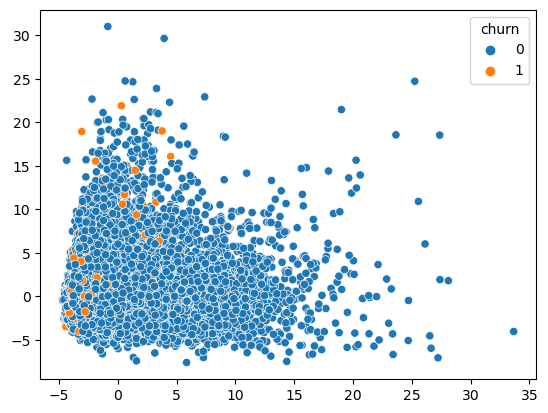

In [106]:
pca = PCA()
pca_components = pca.fit_transform(X_train)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

In [107]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.09825349 0.18709261 0.24088761 0.2883275  0.32798442 0.36609355
 0.39444897 0.42237794 0.44850192 0.47371472 0.49752572 0.52059546
 0.54229743 0.56350921 0.58315905 0.6016858  0.61813022 0.63293898
 0.64736378 0.66156044 0.67520537 0.68765645 0.69984057 0.71093521
 0.72160536 0.73180318 0.74173576 0.75139276 0.76048501 0.76889371
 0.7768848  0.78462758 0.79205887 0.79918754 0.80590777 0.81247571
 0.81896067 0.82534164 0.83161288 0.83770289 0.84376501 0.84959825
 0.85517748 0.86061454 0.86584275 0.87089985 0.8757824  0.88025793
 0.88457894 0.88878312 0.89283235 0.89670077 0.9005251  0.90424925
 0.90796057 0.91152051 0.91494825 0.91825106 0.92144558 0.92451668
 0.92747602 0.93038039 0.93322992 0.93604145 0.93880554 0.94154835
 0.94425275 0.94692886 0.94944619 0.95193451 0.95436333 0.95672582
 0.95904642 0.961167   0.96322525 0.96522079 0.96717096 0.96910572
 0.97096924 0.97282327 0.97464388 0.97641079 0.97813494 0.97981207
 0.9814719  0.98307596 0.98466282 0.98615641 0.98753979 0.9888

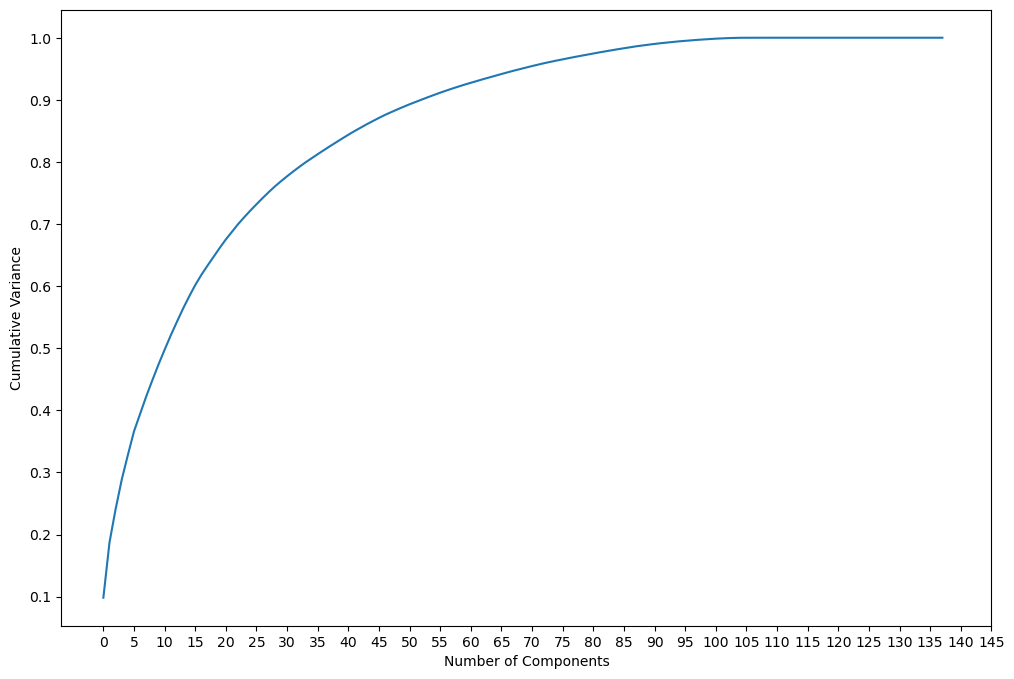

In [108]:
#Plot the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 150, 5))
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

We can see that `60 components` explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

##### Performing PCA with 60 components

In [109]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [110]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [111]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

##### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [112]:
X_test_pca = pca_final.transform(X_test)

## Logistic regression with PCA

In [113]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [114]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [115]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [116]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [117]:
# results of grid search CV
Result = pd.DataFrame(model_cv.cv_results_)
Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109835,0.010240,0.002599,0.000490,0.01,{'C': 0.01},0.035971,0.048780,0.055172,0.020690,...,0.037602,0.012857,6,0.043333,0.043478,0.043771,0.042088,0.038786,0.042291,0.001845
1,0.221875,0.016336,0.002796,0.000401,0.1,{'C': 0.1},0.064748,0.060976,0.062069,0.048276,...,0.054063,0.011421,5,0.070000,0.069565,0.079125,0.060606,0.060708,0.068001,0.006900
2,0.280063,0.027398,0.002200,0.000405,1,{'C': 1},0.064748,0.060976,0.068966,0.068966,...,0.060950,0.010364,4,0.083333,0.078261,0.085859,0.067340,0.069140,0.076787,0.007417
3,0.289176,0.022220,0.002398,0.000489,10,{'C': 10},0.064748,0.067073,0.068966,0.068966,...,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595
4,0.274009,0.010987,0.002193,0.000395,100,{'C': 100},0.064748,0.067073,0.068966,0.068966,...,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595
5,0.272777,0.006509,0.002601,0.000495,1000,{'C': 1000},0.064748,0.067073,0.068966,0.068966,...,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595


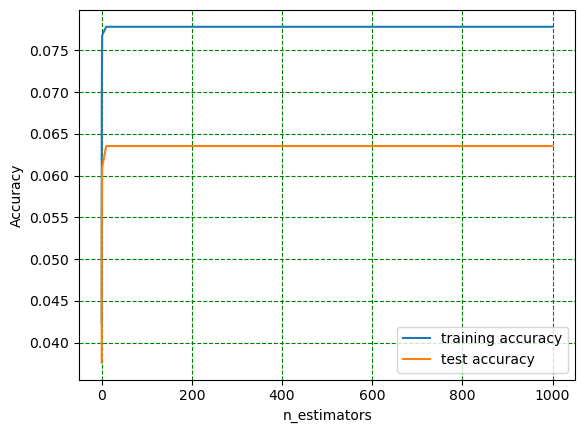

In [121]:

# plotting accuracies with max_depth
plt.figure()
plt.plot(Result["param_C"], 
         Result["mean_train_score"], 
         label="training accuracy")
plt.plot(Result["param_C"], 
         Result["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(color='g', linestyle='--')
plt.legend()
plt.show()

In [134]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("Test sensitivity is {0} at C = {1}".format(best_score, best_C))

Test sensitivity is 0.06353952242655339 at C = 10


#### Logistic regression with optimal C

In [135]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [136]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [137]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [138]:
# confusions matrix
confusions = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21374    51]
 [  686    53]]


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity (Recall)
sensitivity = TP / float(TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / float(TN + FP)
print("Specificity:", specificity)

Accuracy: 0.9667478794441436
Sensitivity: 0.08808290155440414
Specificity: 0.9975691847419597


##### Prediction on the test set

In [149]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [150]:
# confusions matrix
confusions = metrics.confusion_matrix(y_test, y_test_pred)
print(confusions)

[[5335   13]
 [ 176   17]]


In [151]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9658906334596643
Sensitivity:- 0.08808290155440414
Specificity:- 0.9975691847419597


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.89
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.81
    - Specificity = 0.83
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## Support Vector Machine(SVM) with PCA

In [163]:
# Importing SVC
from sklearn.svm import SVC

#### Hyperparameter 

C:- Regularization parameter.

gamma:- Handles non linear classifications.

In [164]:
# specify range of hyperparameters

HyperParamter = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = HyperParamter, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [165]:
# cv results
Result = pd.DataFrame(model_cv.cv_results_)
Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.558919,0.247692,1.889402,0.077234,1,0.01,"{'C': 1, 'gamma': 0.01}",0.966838,0.966838,0.966838,0.966838,0.000000,1,0.967380,0.967989,0.967989,0.967786,0.000287
1,2.126771,0.055443,1.225525,0.015098,1,0.001,"{'C': 1, 'gamma': 0.001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
2,1.231352,0.029886,1.052562,0.031180,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
3,3.193235,0.093532,1.732623,0.026830,10,0.01,"{'C': 10, 'gamma': 0.01}",0.966567,0.965620,0.965620,0.965936,0.000447,9,0.977260,0.977599,0.977599,0.977486,0.000160
4,2.211274,0.042508,1.127738,0.019630,10,0.001,"{'C': 10, 'gamma': 0.001}",0.966567,0.966838,0.966432,0.966613,0.000169,4,0.967244,0.967244,0.967447,0.967312,0.000096
5,2.432264,0.142085,1.114870,0.068037,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.966703,0.966703,0.966432,0.966613,0.000128,4,0.966635,0.966635,0.966770,0.966680,0.000064
6,2.986497,0.099170,1.424929,0.055587,100,0.01,"{'C': 100, 'gamma': 0.01}",0.959800,0.957228,0.958311,0.958446,0.001054,11,0.990187,0.990322,0.990525,0.990345,0.000139
7,2.829022,0.109835,1.183963,0.040882,100,0.001,"{'C': 100, 'gamma': 0.001}",0.966161,0.967109,0.965620,0.966297,0.000615,8,0.969545,0.970425,0.970357,0.970109,0.000400
8,3.411853,0.348414,1.054634,0.050638,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.966703,0.966703,0.965891,0.966432,0.000383,6,0.966635,0.966770,0.966906,0.966770,0.000111
9,3.581132,0.121298,1.234465,0.033483,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.946400,0.947618,0.948836,0.947618,0.000995,12,0.999053,0.998308,0.998646,0.998669,0.000304


##### Plotting the accuracy with various C and gamma values

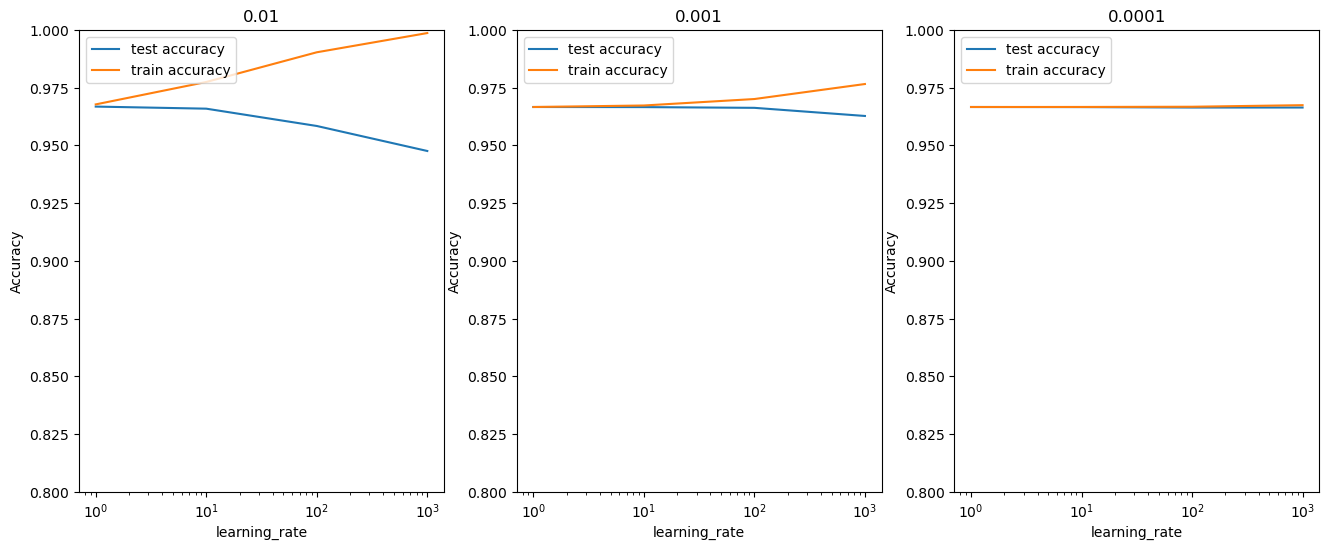

In [166]:
# converting C to numeric type for plotting on x-axis
Result['param_C'] = Result['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = Result[Result['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title("0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = Result[Result['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title("0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = Result[Result['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title("0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [167]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9668381158635625 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


##### Build the model with optimal hyperparameters

In [168]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [169]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [170]:
# confusions matrix
confusions = metrics.confusion_matrix(y_train, y_train_pred)
print(confusions)

[[21425     0]
 [  737     2]]


In [171]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [172]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9667478794441436
Sensitivity:- 0.0027063599458728013
Specificity:- 1.0


##### Prediction on the test set

In [173]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [174]:
# confusions matrix
confusions = metrics.confusion_matrix(y_test, y_test_pred)
print(confusions)

[[5348    0]
 [ 193    0]]


In [175]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [176]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


***Model summary***

- Train set
    - Accuracy = 0.89
    - Sensitivity = 0.92
    - Specificity = 0.85
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.81
    - Specificity = 0.85

## Decision tree with PCA

In [177]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [178]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [179]:
# cv results
Result = pd.DataFrame(model_cv.cv_results_)
Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.558919,0.247692,1.889402,0.077234,1,0.01,"{'C': 1, 'gamma': 0.01}",0.966838,0.966838,0.966838,0.966838,0.000000,1,0.967380,0.967989,0.967989,0.967786,0.000287
1,2.126771,0.055443,1.225525,0.015098,1,0.001,"{'C': 1, 'gamma': 0.001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
2,1.231352,0.029886,1.052562,0.031180,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
3,3.193235,0.093532,1.732623,0.026830,10,0.01,"{'C': 10, 'gamma': 0.01}",0.966567,0.965620,0.965620,0.965936,0.000447,9,0.977260,0.977599,0.977599,0.977486,0.000160
4,2.211274,0.042508,1.127738,0.019630,10,0.001,"{'C': 10, 'gamma': 0.001}",0.966567,0.966838,0.966432,0.966613,0.000169,4,0.967244,0.967244,0.967447,0.967312,0.000096
5,2.432264,0.142085,1.114870,0.068037,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.966703,0.966703,0.966432,0.966613,0.000128,4,0.966635,0.966635,0.966770,0.966680,0.000064
6,2.986497,0.099170,1.424929,0.055587,100,0.01,"{'C': 100, 'gamma': 0.01}",0.959800,0.957228,0.958311,0.958446,0.001054,11,0.990187,0.990322,0.990525,0.990345,0.000139
7,2.829022,0.109835,1.183963,0.040882,100,0.001,"{'C': 100, 'gamma': 0.001}",0.966161,0.967109,0.965620,0.966297,0.000615,8,0.969545,0.970425,0.970357,0.970109,0.000400
8,3.411853,0.348414,1.054634,0.050638,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.966703,0.966703,0.965891,0.966432,0.000383,6,0.966635,0.966770,0.966906,0.966770,0.000111
9,3.581132,0.121298,1.234465,0.033483,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.946400,0.947618,0.948836,0.947618,0.000995,12,0.999053,0.998308,0.998646,0.998669,0.000304


In [180]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.0784611141753999
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


##### Model with optimal hyperparameters

In [181]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [182]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [183]:
# confusions matrix
confusions = metrics.confusion_matrix(y_train, y_train_pred)
print(confusions)

[[21324   101]
 [  606   133]]


In [184]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [185]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9681014257354268
Sensitivity:- 0.17997293640054127
Specificity:- 0.9952858809801634


##### Prediction on the test set

In [186]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [187]:
# confusions matrix
confusions = metrics.confusion_matrix(y_test, y_test_pred)
print(confusions)

[[5314   34]
 [ 175   18]]


In [188]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [189]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9622811766829092
Sensitivity:- 0.09326424870466321
Specificity:- 0.993642483171279


***Model summary***

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## RF with PCA

In [190]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [191]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [192]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9666576430247248 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


##### optimal hyperparameters

In [193]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [194]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [195]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [1437]:
# confusions matrix
confusions = metrics.confusion_matrix(y_train, y_train_pred)
print(confusions)

[[21425     0]
 [  739     0]]


In [1438]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [1439]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9666576430247248
Sensitivity:- 0.0
Specificity:- 1.0


##### Prediction on the test set

In [1440]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [1441]:
# confusions matrix
confusions = metrics.confusion_matrix(y_test, y_test_pred)
print(confusions)

[[5348    0]
 [ 193    0]]


In [1442]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [1443]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.88
    - Specificity = 0.80
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.75
    - Specificity = 0.80
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

###  conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

# Without PCA

## Logistic regression with No PCA

In [1444]:
##### Importing stats model
import statsmodels.api as sm

In [1445]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [1446]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [1447]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22034
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 06 Oct 2024   Deviance:                       4067.2
Time:                        13:39:34   Pearson chi2:                 2.41e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -98.4660   8545.954     -0.012      0.991   -1.68e+04    1.67e+04
loc_og_t2o_mou            7.419e-08   8.97e-06      0.008      0.993   -1.75e-05    1.77e-05
std_og_t2o_mou            4.339e-07   3.67e-05      0.012      0.991   -7.15e-05    7.24e-05
loc_ic_t2o_mou           -2.076e-06      0.000     -0.012      0.991      -0.000       0.000
arpu_6                      -0.1053      0.160     -0.659      0.510      -0.419       0.208
arpu_7                       0.0733      0.175      0.419      0.675      -0.270       0.416
arpu_8                       0.1074      0.231      0.464      0.642      -0.346       0.561
onnet_mou_6                  5.6601      6.260      0.904      0.366      -6.609      17.929
onnet_mou_7                  2.2506      3.748      0.601      0.548      -5.095       9.596
onnet_mou_8                 -4.0213      4.459     -0.902      0.367     -12.760       4.717
offnet_mou_6                 5.9743      6.196      0.964      0.335      -6.169      18.117
offnet_mou_7                 2.8756      3.653      0.787      0.431      -4.285      10.036
offnet_mou_8                -5.1013      4.565     -1.117      0.264     -14.049       3.846
roam_ic_mou_6                0.0752      0.041      1.819      0.069      -0.006       0.156
roam_ic_mou_7               -0.0279      0.046     -0.601      0.548      -0.119       0.063
roam_ic_mou_8                0.0377      0.039      0.974      0.330      -0.038       0.114
roam_og_mou_6               -1.3514      1.509     -0.896      0.370      -4.309       1.606
roam_og_mou_7               -0.4000      0.707     -0.566      0.571      -1.785       0.985
roam_og_mou_8                0.9540      0.925      1.031      0.303      -0.860       2.768
loc_og_t2t_mou_6         -1930.4322   1901.573     -1.015      0.310   -5657.448    1796.583
loc_og_t2t_mou_7          -314.3457   2033.739     -0.155      0.877   -4300.401    3671.710
loc_og_t2t_mou_8          4898.4934   2212.667      2.214      0.027     561.746    9235.241
loc_og_t2m_mou_6         -1960.2463   1930.351     -1.015      0.310   -5743.664    1823.171
loc_og_t2m_mou_7          -290.0499   1873.155     -0.155      0.877   -3961.366    3381.266
loc_og_t2m_mou_8          4892.0608   2209.657      2.214      0.027     561.213    9222.909
loc_og_t2f_mou_6          -174.1892    171.575     -1.015      0.310    -510.471     162.092
loc_og_t2f_mou_7           -27.0020    174.142     -0.155      0.877    -368.314     314.310
loc_og_t2f_mou_8           436.1638    197.203      2.212      0.027      49.653     822.674
loc_og_t2c_mou_6             0.0255      0.041      0.621      0.535      -0.055       0.106
loc_og_t2c_mou_7             0.0229      0.046      0.494      0.622      -0.068       0.114
loc_og_t2c_mou

*** Analysis***

1.The analysis reveals that some features exhibit positive coefficients, while others display negative coefficients, indicating their differing impacts on the model's predictions.

2.Additionally, several features have high p-values, suggesting that they are insignificant in the model and do not contribute meaningfully to the predictive power.

###  RFE

In [1448]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with columns

In [1449]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [1450]:
# RFE selected columns
rfe_coloumns = X_train.columns[rfe.support_]
print(rfe_coloumns)

Index(['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_7', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'vol_3g_mb_8'],
      dtype='object')


### Model-1 with RFE selected columns

In [1451]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_coloumns])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22148
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 06 Oct 2024   Deviance:                       4548.5
Time:                        13:41:11   Pearson chi2:                 2.25e+06
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -89.8874   8158.421     -0.011      0.991   -1.61e+04    1.59e+04
offnet_mou_7         1.2601      0.173      7.277      0.000       0.921       1.599
loc_og_t2m_mou_7    -0.7593      0.142     -5.342      0.000      -1.038      -0.481
loc_og_t2f_mou_8    -1.0922      0.363     -3.011      0.003      -1.803      -0.381
loc_og_mou_8        -0.9819      0.281     -3.499      0.000      -1.532      -0.432
std_og_t2m_mou_7    -0.9070      0.161     -5.630      0.000      -1.223      -0.591
isd_og_mou_8        -1.6307      1.082     -1.507      0.132      -3.752       0.491
og_others_8      -4345.7126   4.27e+05     -0.010      0.992   -8.42e+05    8.33e+05
total_og_mou_8      -0.6784      0.073     -9.354      0.000      -0.821      -0.536
loc_ic_t2m_mou_8    -0.9032      0.607     -1.487      0.137      -2.094       0.287
loc_ic_t2f_mou_8    -0.9618      0.426     -2.256      0.024      -1.797      -0.126
loc_ic_mou_8        -1.3289      0.737     -1.803      0.071      -2.773       0.116
total_ic_mou_8      -1.1255      0.338     -3.334      0.001      -1.787      -0.464
spl_ic_mou_8        -0.6606      0.134     -4.925      0.000      -0.923      -0.398
ic_others_8         -1.4216      0.602     -2.363      0.018      -2.601      -0.242
vol_3g_mb_8         -1.3204      0.188     -7.011      0.000      -1.690      -0.951
====================================================================================
"""

#### Checking VIFs

In [1452]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1453]:
# Create a DataFrame that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_coloumns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_coloumns].values, i) for i in range(X_train[rfe_coloumns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,51.29
4,std_og_t2m_mou_7,44.39
1,loc_og_t2m_mou_7,15.15
10,loc_ic_mou_8,8.21
11,total_ic_mou_8,5.29
8,loc_ic_t2m_mou_8,3.82
3,loc_og_mou_8,2.49
7,total_og_mou_8,1.86
9,loc_ic_t2f_mou_8,1.28
2,loc_og_t2f_mou_8,1.25


##### Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [1454]:
# Removing og_others_8 column 
log_cols = rfe_coloumns.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'isd_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'vol_3g_mb_8']


### Model-2
Building the model after removing og_others_8 variable.

In [1455]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22149
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2277.4
Date:                Sun, 06 Oct 2024   Deviance:                       4554.7
Time:                        13:41:14   Pearson chi2:                 2.28e+06
No. Iterations:                    12   Pseudo R-squ. (CS):            0.08319
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8995      0.216    -32.008      0.000      -7.322      -6.477
offnet_mou_7         1.2641      0.173      7.300      0.000       0.925       1.603
loc_og_t2m_mou_7    -0.7583      0.142     -5.338      0.000      -1.037      -0.480
loc_og_t2f_mou_8    -1.0918      0.363     -3.007      0.003      -1.803      -0.380
loc_og_mou_8        -0.9855      0.281     -3.508      0.000      -1.536      -0.435
std_og_t2m_mou_7    -0.9110      0.161     -5.655      0.000      -1.227      -0.595
isd_og_mou_8        -1.6705      1.073     -1.557      0.119      -3.773       0.432
total_og_mou_8      -0.6796      0.073     -9.365      0.000      -0.822      -0.537
loc_ic_t2m_mou_8    -0.9015      0.608     -1.484      0.138      -2.092       0.289
loc_ic_t2f_mou_8    -0.9665      0.427     -2.264      0.024      -1.803      -0.130
loc_ic_mou_8        -1.3297      0.738     -1.803      0.071      -2.775       0.116
total_ic_mou_8      -1.1259      0.338     -3.331      0.001      -1.788      -0.463
spl_ic_mou_8        -0.6613      0.134     -4.939      0.000      -0.924      -0.399
ic_others_8         -1.4190      0.602     -2.358      0.018      -2.598      -0.240
vol_3g_mb_8         -1.3187      0.188     -7.003      0.000      -1.688      -0.950
====================================================================================
"""

#### Checking VIF for Model-2

In [1456]:
# Create a DataFrame that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,51.29
4,std_og_t2m_mou_7,44.39
1,loc_og_t2m_mou_7,15.15
9,loc_ic_mou_8,8.20
10,total_ic_mou_8,5.29
7,loc_ic_t2m_mou_8,3.81
3,loc_og_mou_8,2.49
6,total_og_mou_8,1.86
8,loc_ic_t2f_mou_8,1.28
2,loc_og_t2f_mou_8,1.25


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [1457]:
# Removing offnet_mou_8 column
if 'offnet_mou_8' in log_cols:
    log_cols.remove('offnet_mou_8')
else:
    print("'offnet_mou_8' is not in log_cols.")

'offnet_mou_8' is not in log_cols.


### Model-3
Model after removing offnet_mou_8 column.

###  Model performance on the train set

In [1458]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

76637    8.432154e-02
44417    5.659132e-03
77582    4.125094e-04
48224    9.458843e-04
76321    2.485673e-16
dtype: float64

##### Creating a DataFrame with the actual churn and the predicted probabilities

In [1459]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,8.432154e-02,0
1,0,5.659132e-03,1
2,0,4.125094e-04,2
3,0,9.458843e-04,3
4,0,2.485673e-16,4


##### Finding Optimal Probablity Cutoff Point

In [1460]:
#  probablity cutoffs
probability_cutoff = [float(p/10) for p in range(10)]

for i in probability_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,8.432154e-02,0,1,0,0,0,0,0,0,0,0,0
1,0,5.659132e-03,1,1,0,0,0,0,0,0,0,0,0
2,0,4.125094e-04,2,1,0,0,0,0,0,0,0,0,0
3,0,9.458843e-04,3,1,0,0,0,0,0,0,0,0,0
4,0,2.485673e-16,4,1,0,0,0,0,0,0,0,0,0


##### Now let's calculate various probability cutoffs.

In [1461]:
# DataFrame
CDF = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in probability_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    CDF.loc[i] =[ i ,accuracy,sensi,speci]
print(CDF)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.033342     1.000000     0.000000
0.1          0.1  0.907508     0.713126     0.914212
0.2          0.2  0.957905     0.557510     0.971715
0.3          0.3  0.965846     0.124493     0.994866
0.4          0.4  0.966613     0.043302     0.998460
0.5          0.5  0.966748     0.021651     0.999347
0.6          0.6  0.966613     0.012179     0.999533
0.7          0.7  0.966567     0.004060     0.999767
0.8          0.8  0.966522     0.001353     0.999813
0.9          0.9  0.966613     0.001353     0.999907


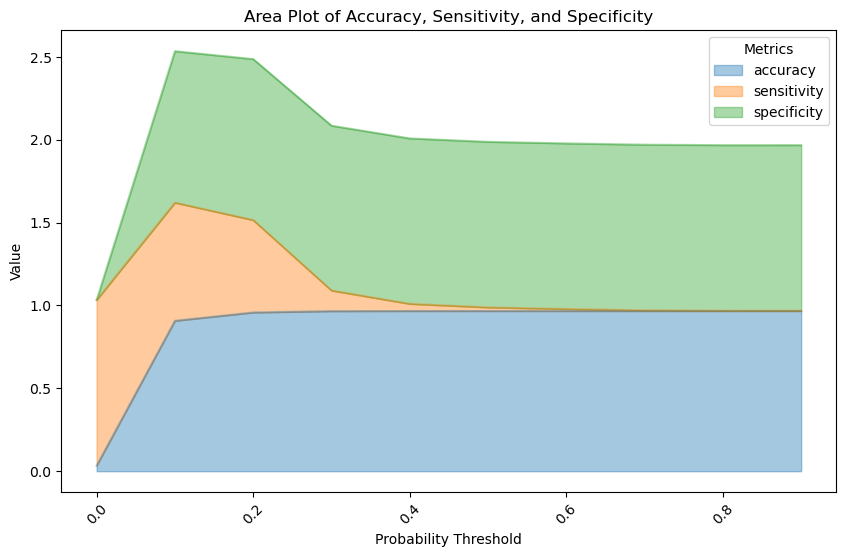

In [1511]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
CDF.set_index('probability')[['accuracy', 'sensitivity', 'specificity']].plot(kind='area', alpha=0.4, figsize=(10, 6))
plt.title('Area Plot of Accuracy, Sensitivity, and Specificity')
plt.ylabel('Value')
plt.xlabel('Probability Threshold')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

In [1463]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,8.432154e-02,0,1,0,0,0,0,0,0,0,0,0,0
1,0,5.659132e-03,1,1,0,0,0,0,0,0,0,0,0,0
2,0,4.125094e-04,2,1,0,0,0,0,0,0,0,0,0,0
3,0,9.458843e-04,3,1,0,0,0,0,0,0,0,0,0,0
4,0,2.485673e-16,4,1,0,0,0,0,0,0,0,0,0,0


##### Metrics

In [1464]:
# confusions metrics
confusions = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusions)

[[21411    14]
 [  723    16]]


In [1465]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [1466]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9667478794441436
Sensitivity:- 0.02165087956698241
Specificity:- 0.9993465577596266


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [1504]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

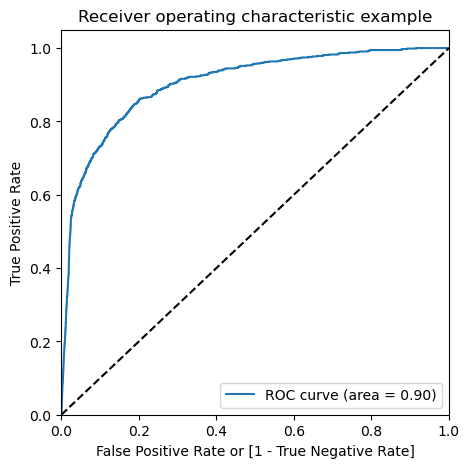

In [1505]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [1469]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [1470]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [1471]:
# Adding constant on the test set
import statsmodels.api as sm
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [1472]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [1473]:
y_test_pred.head()

5704     0.001833
64892    0.005579
39613    0.000389
93118    0.001055
81235    0.000500
dtype: float64

In [1474]:
# Converting y_test_pred to a DataFrame because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.001833
64892,0.005579
39613,0.000389
93118,0.001055
81235,0.000500


In [1475]:
# Convetting y_test to a DataFrame
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [1476]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [1477]:
# Removing index form the both DataFrames for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1478]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [1479]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.001833
1,0,64892,0.005579
2,0,39613,0.000389
3,0,93118,0.001055
4,0,81235,0.000500


In [1480]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [1481]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(columns=['CustID', 'churn', 'churn_prob'])


In [1482]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.001833
1,64892,0,0.005579
2,39613,0,0.000389
3,93118,0,0.001055
4,81235,0,0.000500


In [1483]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [1484]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.001833,0
1,64892,0,0.005579,0
2,39613,0,0.000389,0
3,93118,0,0.001055,0
4,81235,0,0.000500,0


##### Metrics

In [1485]:
# confusions matrix
confusions = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusions)

[[5345    3]
 [ 186    7]]


In [1486]:
TP = confusions[1,1] # true positive 
TN = confusions[0,0] # true negatives
FP = confusions[0,1] # false positives
FN = confusions[1,0] # false negatives

In [1501]:
# Accuracy
accuracy = accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print("Accuracy:", accuracy)

# Sensitivity 
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
print("Sensitivity :", sensitivity)

# Specificity
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
print("Specificity:", specificity)

Accuracy: 0.9658906334596643
Sensitivity : 0.03626943005181347
Specificity: 0.99943904263276


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## Business recomendation

#### Plots of important predictors for churn and non churn customers


The analysis shows that churned customers have a lower distribution of usage minutes for the month of August compared to non-churned customers. This indicates that churned customers tend to use fewer minutes, suggesting a potential relationship between lower usage and the likelihood of customer churn.

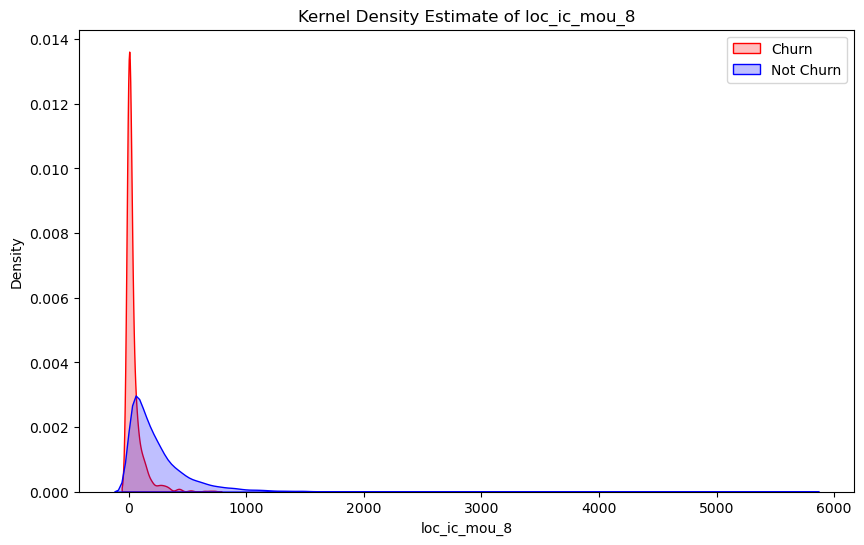

In [1497]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data_churn['loc_ic_mou_8'], label='Churn', color='red', fill=True)
sns.kdeplot(data_non_churn['loc_ic_mou_8'], label='Not Churn', color='blue', fill=True)
plt.title('Kernel Density Estimate of loc_ic_mou_8')
plt.xlabel('loc_ic_mou_8')
plt.ylabel('Density')
plt.legend()
plt.show()

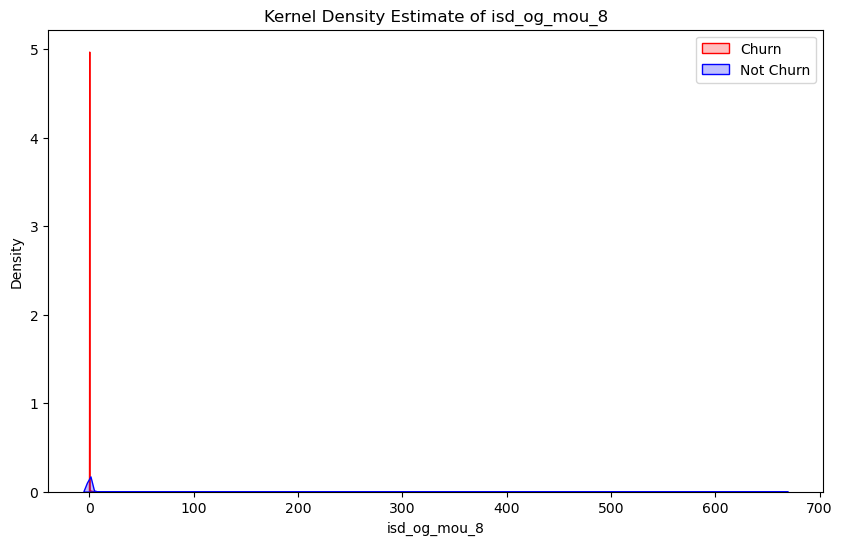

In [1498]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data_churn['isd_og_mou_8'], label='Churn', color='red', fill=True)
sns.kdeplot(data_non_churn['isd_og_mou_8'], label='Not Churn', color='blue', fill=True)
plt.title('Kernel Density Estimate of isd_og_mou_8')
plt.xlabel('isd_og_mou_8')
plt.ylabel('Density')
plt.legend()
plt.show()

The analysis reveals that the ISD outgoing minutes of usage for churned customers in August are concentrated close to zero. In contrast, non-churned customers exhibit a slightly higher level of usage. This disparity suggests that churned customers are significantly less engaged in ISD calls compared to their non-churned counterparts.

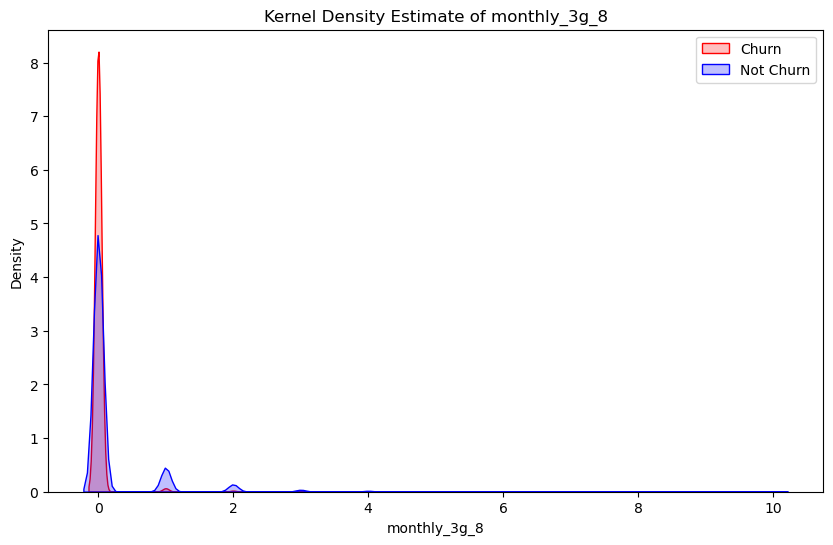

In [1499]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data_churn['monthly_3g_8'], label='Churn', color='red', fill=True)
sns.kdeplot(data_non_churn['monthly_3g_8'], label='Not Churn', color='blue', fill=True)
plt.title('Kernel Density Estimate of monthly_3g_8')
plt.xlabel('monthly_3g_8')
plt.ylabel('Density')
plt.legend()
plt.show()

The analysis indicates that the monthly 3G data usage for churned customers in August is predominantly clustered around 1, while non-churned customers exhibit a wider distribution across various usage levels. This suggests that churned customers have a more limited engagement with 3G data services compared to non-churned customers.

Additionally, we can plot the distribution of churn for each variable that has a higher coefficient. This will help us visualize how these key predictors relate to churn rates and identify potential areas for intervention.